<a href="https://colab.research.google.com/github/Christianah-O/Python-Practice/blob/main/predicting_med_expenses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Collection

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/medical-charges.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Understanding

In [ ]:
#checking the details of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#check if there are any duplicates
df.duplicated().sum()

np.int64(1)

In [ ]:
#drop duplicate
df.drop_duplicates(inplace=True)

In [ ]:
#summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


-No missing values

-there was one duplicate

-Duplicate was removed

-summary statistics is good


Feature Engineering

We extract new features from existing column to enhance model's ability to learn better.

-extracting ‘bmi_category’ from the ‘bmi’ into standard health range.

-extracting ‘age_groups’ from ‘age’ into age stages

-The general BMI categories for adults are: Underweight (less than 18.5), Normal weight (18.5 to 24.9), Overweight (25 to 29.9), and Obesity (30 or higher)

In [ ]:
df['bmi'].max()

53.13

In [ ]:
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.49, 24.9, 29.9, 39.9, 53.2 ], labels=['under_weight','normal_weight', 'over_weight', 'obesity', 'morbid_obesity'])
#highest bmi in data is 53.13 making last bins 53.2

Commonly used age group stages

0 to 17 - teen

18 to 35 - Young Adult

36 to 60 - Adult

61+ - Senior

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[0, 17, 35,  60, 65], labels=['teen', 'young adult','adult', 'senior'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1337 non-null   int64   
 1   sex           1337 non-null   object  
 2   bmi           1337 non-null   float64 
 3   children      1337 non-null   int64   
 4   smoker        1337 non-null   object  
 5   region        1337 non-null   object  
 6   charges       1337 non-null   float64 
 7   bmi_category  1337 non-null   category
 8   age_group     1337 non-null   category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 86.6+ KB


the new features have been added to the data

Visualization

In [ ]:
#split into num_cols and cat_cols
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
cat_cols

['sex', 'smoker', 'region', 'bmi_category', 'age_group']

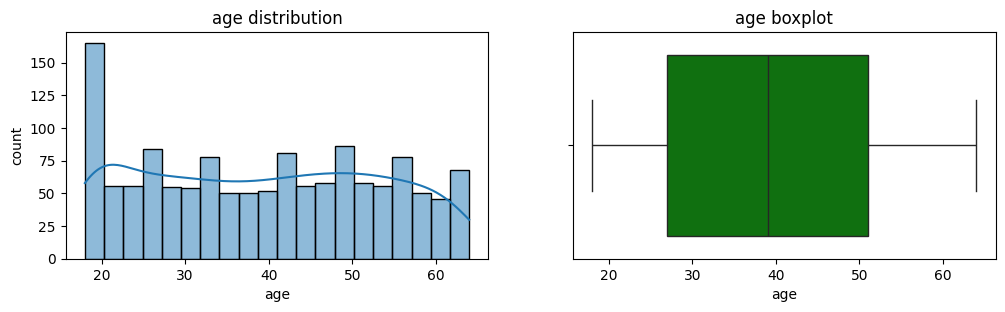

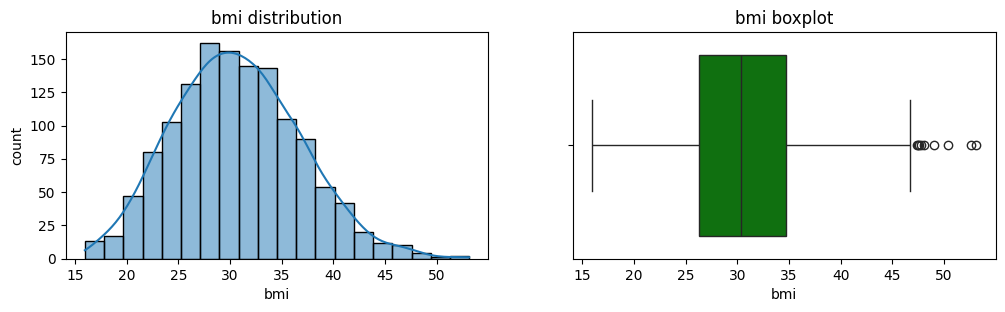

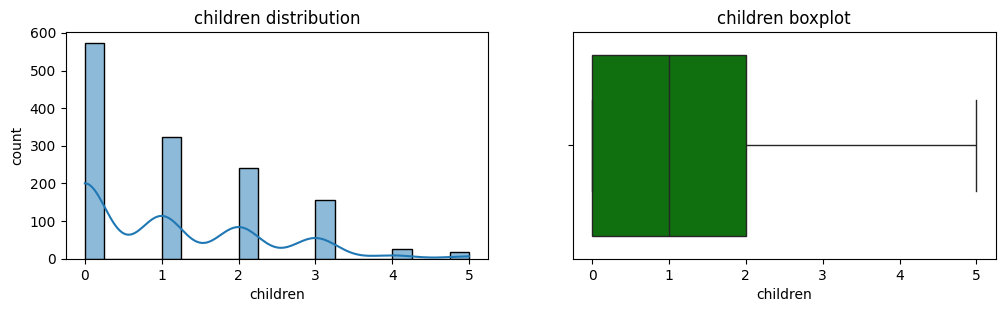

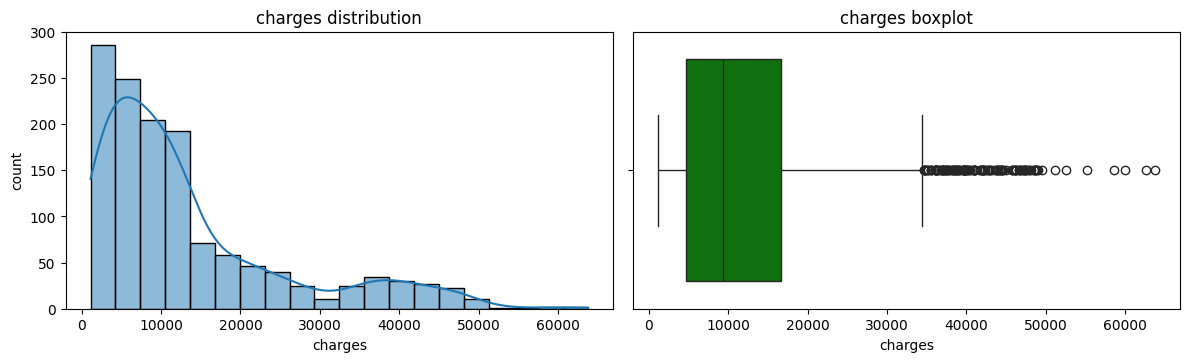

In [ ]:
#visualize num_cols

for col in num_cols:
  plt.figure(figsize=(12, 10))
  plt.subplot(3, 2, 1)
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(f'{col} distribution')
  plt.xlabel(col)
  plt.ylabel('count')
  #for boxplot
  plt.subplot(3, 2, 2)
  sns.boxplot(x=df[col], color='green')
  plt.title(f'{col} boxplot')
plt.tight_layout()
plt.show()


-age,bmi, children are okay since they are in natural range of order

-target column(charges) is highly right skewed

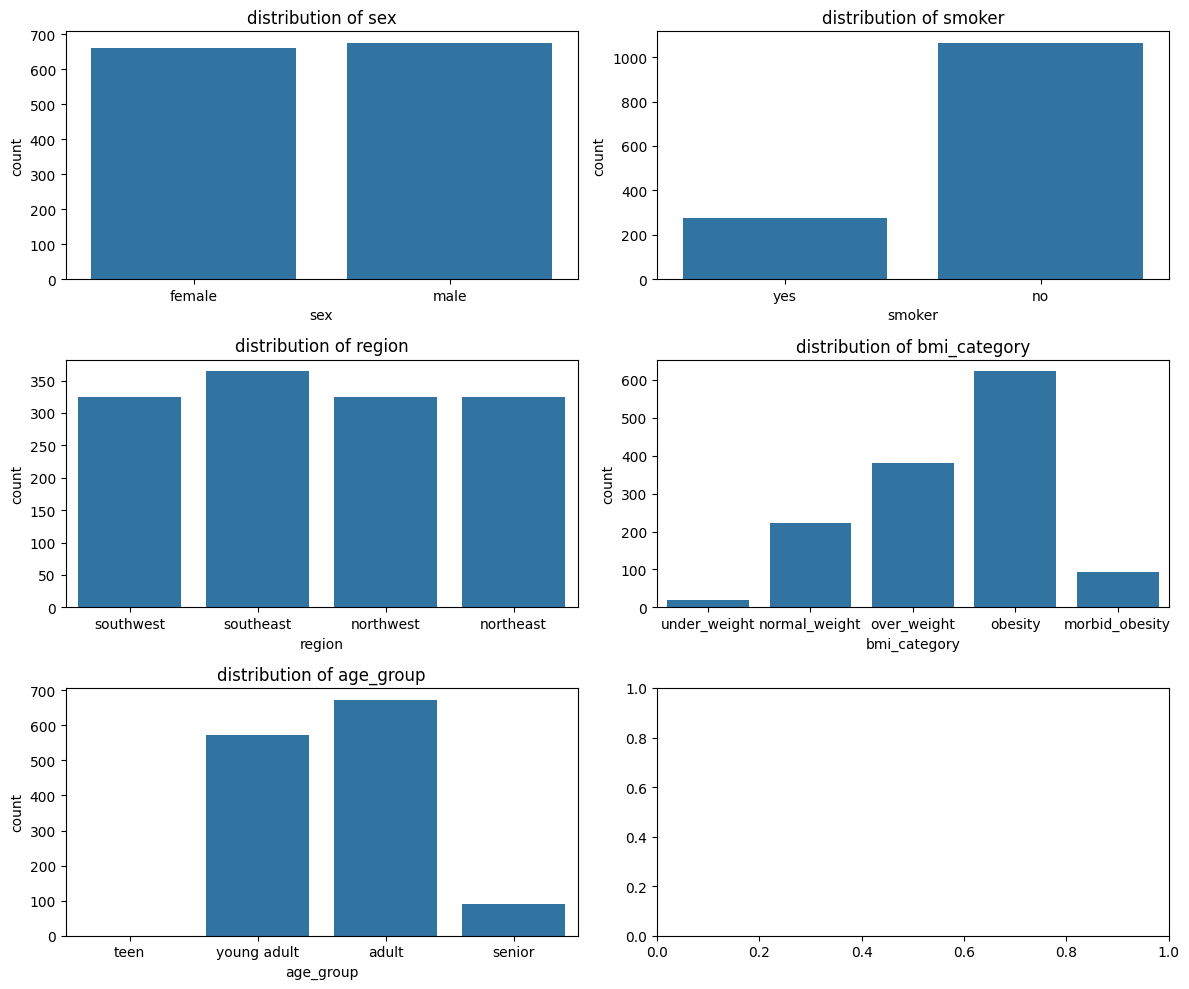

In [ ]:
#cat_cols
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i, col in enumerate(cat_cols):
  ax = axes[i//2, i%2]
  sns.countplot(ax=ax, data=df, x=col)
  ax.set_title(f'distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
#correlation matrix
corr_matrix = df[num_cols].corr()

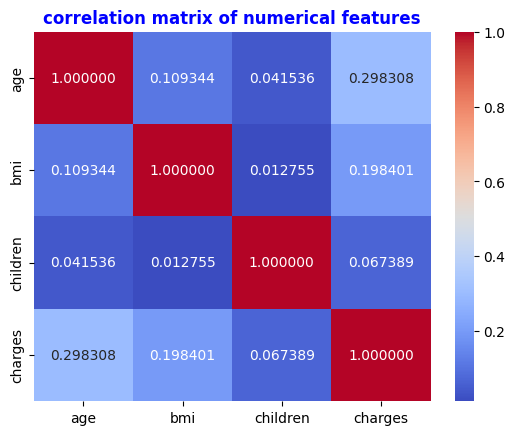

In [ ]:
#using heatmap for corr_matrix
sns.heatmap(corr_matrix, annot=True, fmt='2f', cmap='coolwarm')
plt.title('correlation matrix of numerical features', fontweight='bold', fontsize=12, color='b')
plt.show()

Data Preparation


In [ ]:
#splitting into features and target
features = df.drop(columns='charges')
target = df['charges']

In [ ]:
#split into training and test
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=20)

Encoding- converting cat_cols to numbers

Data Preprocessing

To make my categorical variables machine-readable and avoid misleading order, I used one-hot encoding.
OneHotEncoder is used when category have no order

In [ ]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder()

In [ ]:
train_cat = encoder.fit_transform(train_features[cat_cols]).toarray()
test_cat = encoder.transform(test_features[cat_cols]).toarray()



In [ ]:
#scaling the numerical features
scaler = StandardScaler()


In [ ]:
num_colss = ['age', 'bmi', 'children']

In [ ]:
train_num = scaler.fit_transform(train_features[num_colss])
test_num = scaler.transform(test_features[num_colss])


In [ ]:
#combine processed data
train_processed = np.hstack((train_num, train_cat))
test_processed = np.hstack((test_num, test_cat))

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(train_processed, train_target)

LinearRegression()

In [ ]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train_mse = mean_squared_error(train_target, train_pred)
test_mse = mean_squared_error(test_target, test_pred)

In [ ]:
train_mse, test_mse

(37148850.13292819, 31076676.683091376)

Error is so large

In [ ]:
train_score = r2_score(train_target, train_pred)
test_score = r2_score(test_target, test_pred)

In [ ]:
train_score, test_score

(0.744934240677323, 0.7930230103779194)

We overlooked the skewness of target column earlier
but my model has high test error as shown by MSE
so we can go back to fix target column skewness

In [ ]:
#to reduce skewness, I apply a log transformation
#since target column is highly right skewed
df['log_charges'] = np.log(df['charges'])

In [ ]:
#lets run this to add log_charges to num_cold
num_cols = df.select_dtypes(include=np.number).columns.tolist()


In [ ]:
num_cols

['age', 'bmi', 'children', 'charges', 'log_charges']

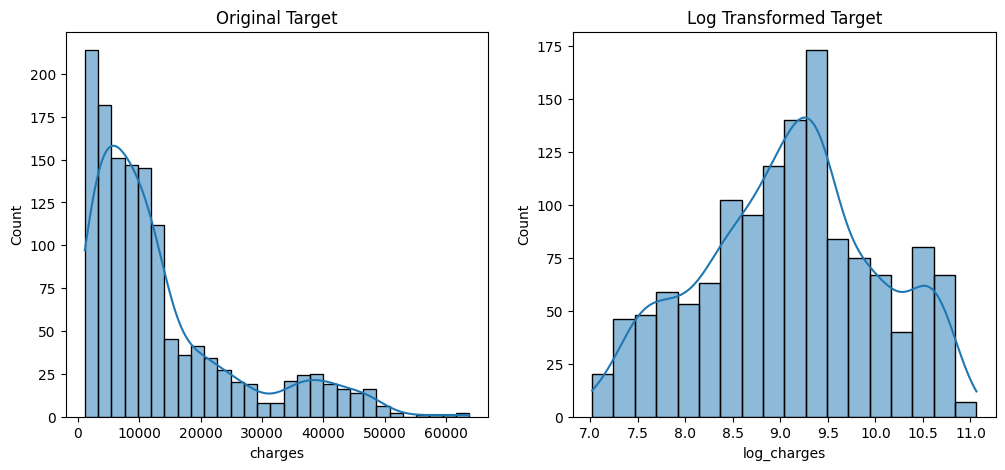

In [ ]:
# after applying log, target column
#not longer right skewed, so log_charged will be our target column
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['charges'], kde=True)
plt.title("Original Target")

plt.subplot(1,2,2)
sns.histplot(df['log_charges'], kde=True)
plt.title("Log Transformed Target")
plt.show()

In [ ]:
#correlation matrix
corr_matrix = df[num_cols].corr()

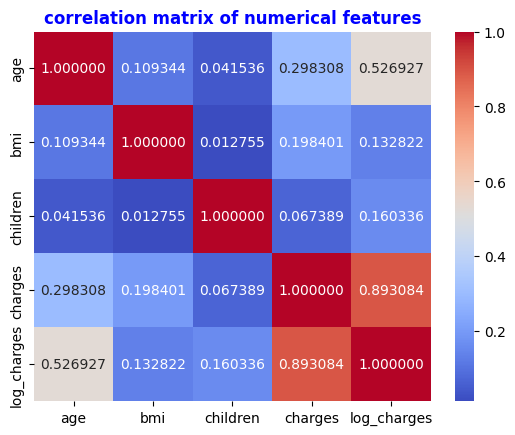

In [ ]:
#using heatmap for corr_matrix
sns.heatmap(corr_matrix, annot=True, fmt='2f', cmap='coolwarm')
plt.title('correlation matrix of numerical features', fontweight='bold', fontsize=12, color='b')
plt.show()

In [ ]:
#splitting into features and target
#but dropping charges and using log_charges as target
eatures = df.drop(columns=['log_charges','charges'])
target = df['log_charges']

In [ ]:
#split into training and test
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=20)

In [ ]:

from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder()

In [ ]:
train_cats = encoder.fit_transform(train_features[cat_cols]).toarray()
test_cats = encoder.transform(test_features[cat_cols]).toarray()

In [ ]:
#scaling num_features again
scalers = StandardScaler()


In [ ]:
num_colsss = ['age', 'bmi', 'children']

In [ ]:
train_nums = scalers.fit_transform(train_features[num_colsss])
test_nums = scalers.transform(test_features[num_colsss])

In [ ]:
#combine
train_prcd = np.hstack((train_nums, train_cats))
test_prcd = np.hstack((test_nums, test_cats))

In [ ]:
#training model again
from sklearn.linear_model import LinearRegression
models = LinearRegression()

In [ ]:
models.fit(train_prcd, train_target)

LinearRegression()

In [ ]:
train_preds = models.predict(train_prcd)
test_preds = models.predict(test_prcd)

In [ ]:
#model evaluation to check if our error
#model evaluation to check if our error
#has reduced and performance become great

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train_msee = mean_squared_error(train_target, train_preds)
test_msee = mean_squared_error(test_target, test_preds)

In [ ]:
train_msee, test_msee

(0.20469461933194377, 0.15027557361276694)

Now, The error significantly reduced after transforming the target variable.

In [ ]:
trains_score = r2_score(train_target, train_preds)
tests_score = r2_score(test_target, test_preds)

In [ ]:
trains_score, tests_score

(0.7593779403230312, 0.815282442366889)

The model performance has significantly increased as well.